<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/Salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/sample_data/Salary_dataset.csv")

# Display the first few rows
print(data.head())



   Unnamed: 0  YearsExperience  Salary
0           0              1.2   39344
1           1              1.4   46206
2           2              1.6   37732
3           3              2.1   43526
4           4              2.3   39892


In [33]:
data.shape

(30, 3)

In [34]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [36]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [37]:
# Features and target
# Check the actual column name for salary in your DataFrame using data.columns
print(data.columns)  # This will print all column names

# Assuming the column is named 'Salary' instead of 'salary', change the code as follows:
X = data.drop('Salary', axis=1)  # Replace 'Salary' with the actual column name
y = data['Salary']  # Replace 'Salary' with the actual column name

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


In [38]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [39]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# ... (your existing code to prepare X and y) ...

# Create an instance of the Linear Regression model
linear_model = LinearRegression()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Now you can fit the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predictions and Metrics
from sklearn.metrics import r2_score, mean_squared_error
y_pred = linear_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression MSE", mean_squared_error(y_test, y_pred))

Linear Regression R²: 0.7376935938883872
Linear Regression MSE 54042526.90044927


In [41]:
y_pred

array([72608.50720553, 91104.30732392, 62279.66064859])

In [42]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, y_pred)
print("R²:", r2_score)

R²: 0.7376935938883872


In [43]:
# Experiment with n_estimators
from sklearn.metrics import r2_score, mean_squared_error # Import r2_score and mean_squared_error

for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"n_estimators {n} - R²: {r2_score(y_test, y_pred_rf)} , MSE {mean_squared_error(y_test, y_pred_rf)}") # Call the imported functions

n_estimators 50 - R²: 0.5404888289170071 , MSE 94672277.32799995
n_estimators 100 - R²: 0.5582382687883962 , MSE 91015391.4900334
n_estimators 200 - R²: 0.5919832571419887 , MSE 84062970.96821669


In [44]:
# Experiment with max_depth
for depth in [10, 20, 30]:
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print(f"max_depth {depth} - R²: {r2_score(y_test, y_pred_rf)}, MSE{mean_squared_error(y_test, y_pred_rf)}")

max_depth 10 - R²: 0.5582382687883962, MSE91015391.4900334
max_depth 20 - R²: 0.5582382687883962, MSE91015391.4900334
max_depth 30 - R²: 0.5582382687883962, MSE91015391.4900334


In [27]:
# Experiment with n_estimators
for n in [50, 100, 200]:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
print(f"n_estimators {n} - R²: {r2_score(y_test, y_pred_rf)} , MSE{mean_squared_error(y_test, y_pred_rf)}")

n_estimators 200 - R²: 0.5919832571419887 , MSE84062970.96821669


Linear Regression R²: 0.7376935938883872
Linear Regression MSE: 54042526.90044927


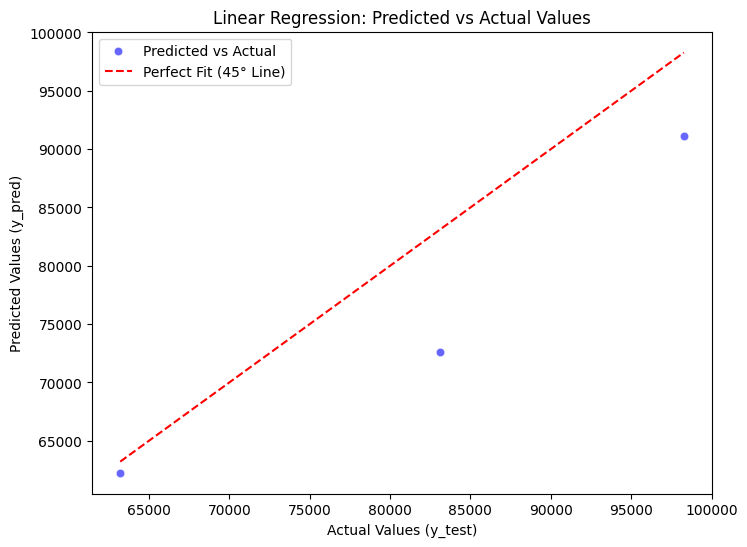

Text(0, 0.5, 'Residuals (y_test - y_pred)')

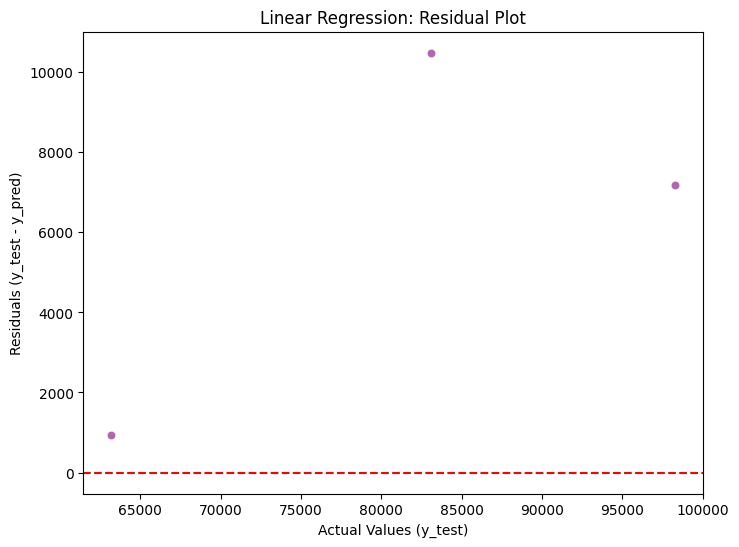

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred = linear_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression R²:", r2)
print("Linear Regression MSE:", mse)

# Plot 1: Predicted vs. Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit (45° Line)")
plt.title("Linear Regression: Predicted vs Actual Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.show()

# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color="purple", alpha=0.6)
plt.axhline(0, color='r', linestyle='--', label="Zero Residual Line")
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")


In [59]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Salary dataset
data = pd.read_csv("/content/sample_data/Salary_dataset.csv")  # Replace with your actual file path

# Inspect the first few rows of the dataset
print(data.head())

# Define features and target
X = data[['YearsExperience']]  # Independent variable (feature)
y = data['Salary']  # Dependent variable (target)

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform k-fold cross-validation (5 folds in this case)
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation Mean Squared Errors: {cv_scores}")
print(f"Mean MSE from Cross-Validation: {cv_scores.mean()}")
print(f"Standard Deviation of MSE: {cv_scores.std()}")

# Fit the model on the full data and evaluate on the test set (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Calculate MSE and R² score on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R² score on the test set
print(f"Test Set MSE: {mse}")
print(f"Test Set R² Score: {r2}")


   Unnamed: 0  YearsExperience  Salary
0           0              1.2   39344
1           1              1.4   46206
2           2              1.6   37732
3           3              2.1   43526
4           4              2.3   39892
Cross-Validation Mean Squared Errors: [25905138.76968    30974669.99857575 59780662.11837515 68417038.21806614
 35766738.23965804]
Mean MSE from Cross-Validation: 44168849.46887101
Standard Deviation of MSE: 16792547.90272151
Test Set MSE: 49830096.855908334
Test Set R² Score: 0.9024461774180498


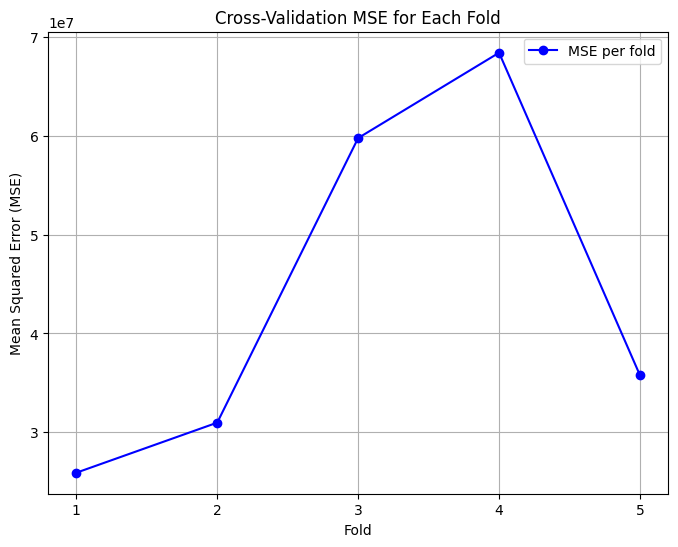

In [60]:
import matplotlib.pyplot as plt

# Visualizing Cross-Validation MSE for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', color='blue', label='MSE per fold')
plt.title('Cross-Validation MSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 6))  # Label x-axis for each fold
plt.grid(True)
plt.legend()
plt.show()


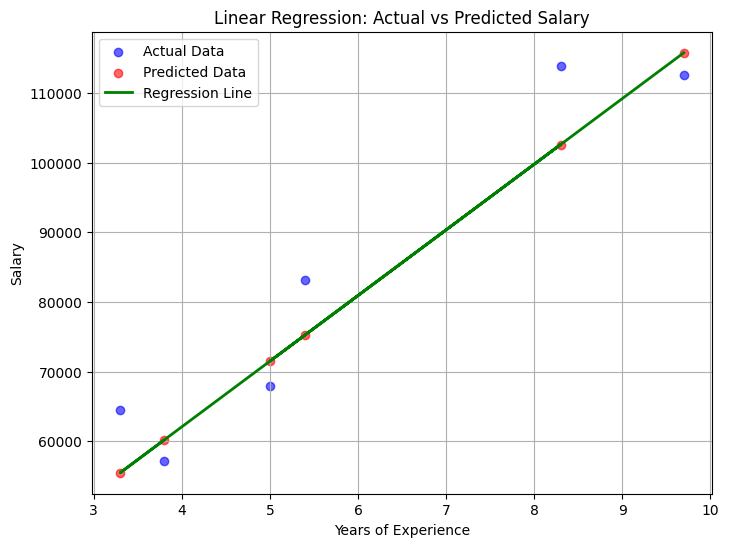

In [61]:
# Visualize Linear Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.6)

# Plotting the regression line
plt.plot(X_test, linear_model.predict(X_test), color='green', label='Regression Line', linewidth=2)

plt.title('Linear Regression: Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


   Unnamed: 0  YearsExperience  Salary
0           0              1.2   39344
1           1              1.4   46206
2           2              1.6   37732
3           3              2.1   43526
4           4              2.3   39892
Cross-Validation Mean Squared Errors: [25905138.76968    30974669.99857575 59780662.11837515 68417038.21806614
 35766738.23965804]
Mean MSE from Cross-Validation: 44168849.46887101
Standard Deviation of MSE: 16792547.90272151


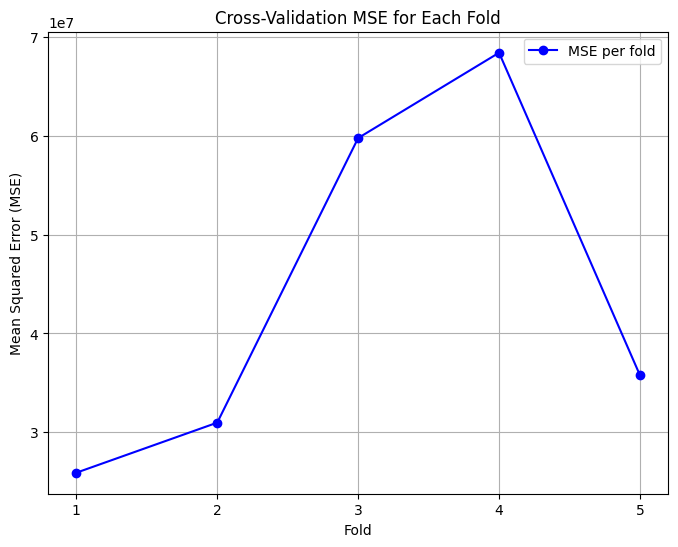

Test Set MSE: 49830096.855908334
Test Set R² Score: 0.9024461774180498


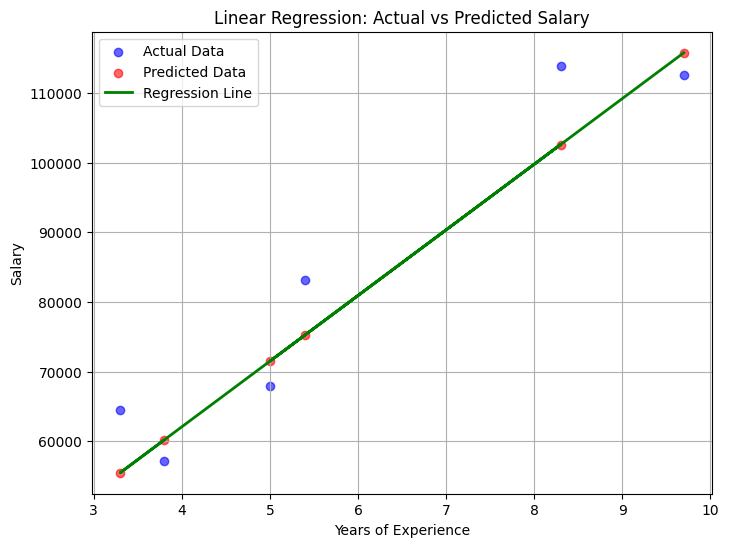

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Salary dataset
data = pd.read_csv("/content/sample_data/Salary_dataset.csv")  # Replace with your actual file path

# Inspect the first few rows of the dataset
print(data.head())

# Define features and target
X = data[['YearsExperience']]  # Independent variable (feature)
y = data['Salary']  # Dependent variable (target)

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform k-fold cross-validation (5 folds in this case)
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation Mean Squared Errors: {cv_scores}")
print(f"Mean MSE from Cross-Validation: {cv_scores.mean()}")
print(f"Standard Deviation of MSE: {cv_scores.std()}")

# Visualizing Cross-Validation MSE for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', color='blue', label='MSE per fold')
plt.title('Cross-Validation MSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 6))  # Label x-axis for each fold
plt.grid(True)
plt.legend()
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Calculate MSE and R² score on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R² score on the test set
print(f"Test Set MSE: {mse}")
print(f"Test Set R² Score: {r2}")

# Visualize Linear Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Data', alpha=0.6)

# Plotting the regression line
plt.plot(X_test, linear_model.predict(X_test), color='green', label='Regression Line', linewidth=2)

plt.title('Linear Regression: Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


Cross-Validation R² scores: [ 0.38581697 -1.22593659  0.2441607   0.28343226  0.22359091]
Mean R² score from Cross-Validation: -0.01778715230694845
Test Set R² Score: 0.9021627846740266
Test Set Mean Squared Error: 49974852.71999637


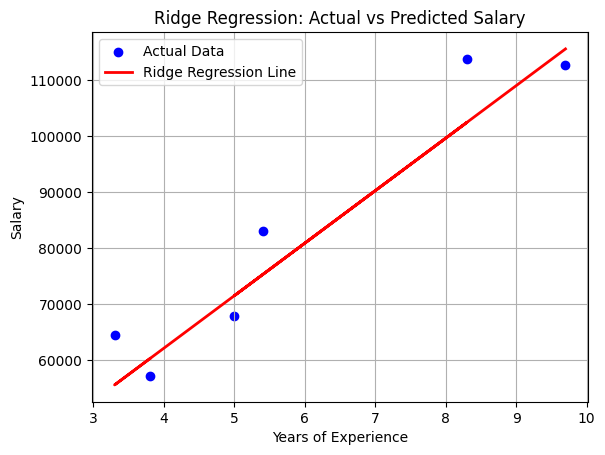

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load the Salary dataset
data = pd.read_csv("/content/sample_data/Salary_dataset.csv")

# Define features and target
X = data[['YearsExperience']]  # Independent variable
y = data['Salary']  # Dependent variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength

# Perform Cross-validation
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')  # Using R² as the scoring metric
print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Mean R² score from Cross-Validation: {cv_scores.mean()}")

# Fit Ridge Regression model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R² score on the test set
r2 = r2_score(y_test, y_pred)
print(f"Test Set R² Score: {r2}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse}")

# Visualize Linear Regression with Ridge
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Line', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


R² score for Polynomial Regression: 0.9635969766249464
MSE: 26446769.60683776


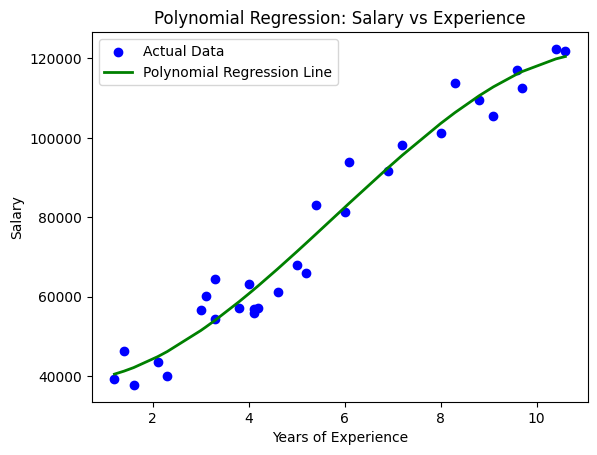

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Example: Polynomial regression on the same dataset as above
poly = PolynomialFeatures(degree=3)  # Increase the degree to capture more complexity
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Make predictions
y_pred_poly = model_poly.predict(X_poly)

# Calculate R² score
r2_poly = r2_score(y, y_pred_poly)
print(f"R² score for Polynomial Regression: {r2_poly}")
print(f"MSE: {mean_squared_error(y, y_pred_poly)}")

# Plot the polynomial regression results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression Line', linewidth=2)
plt.title('Polynomial Regression: Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [68]:
MSE = 26446769.60683776


In [69]:
import numpy as np

# Given MSE
mse = 26446769.60683776

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 5142.642278716045


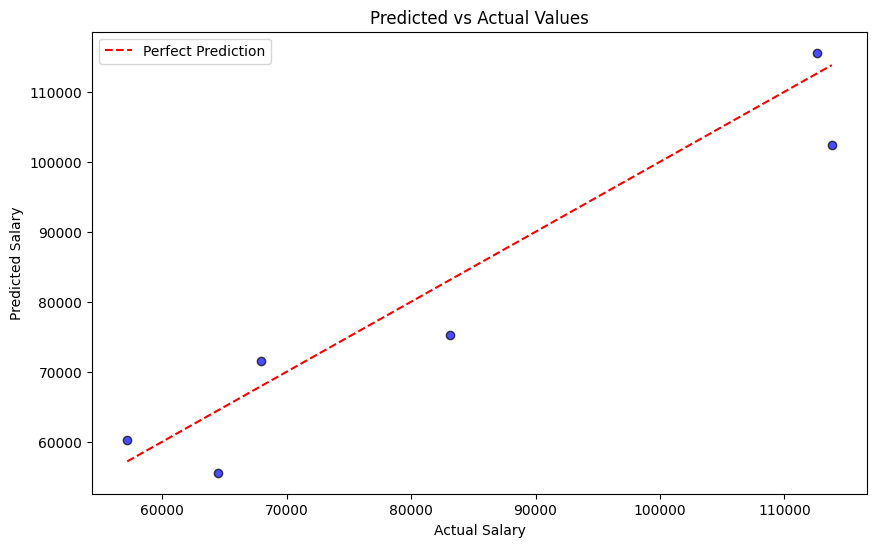

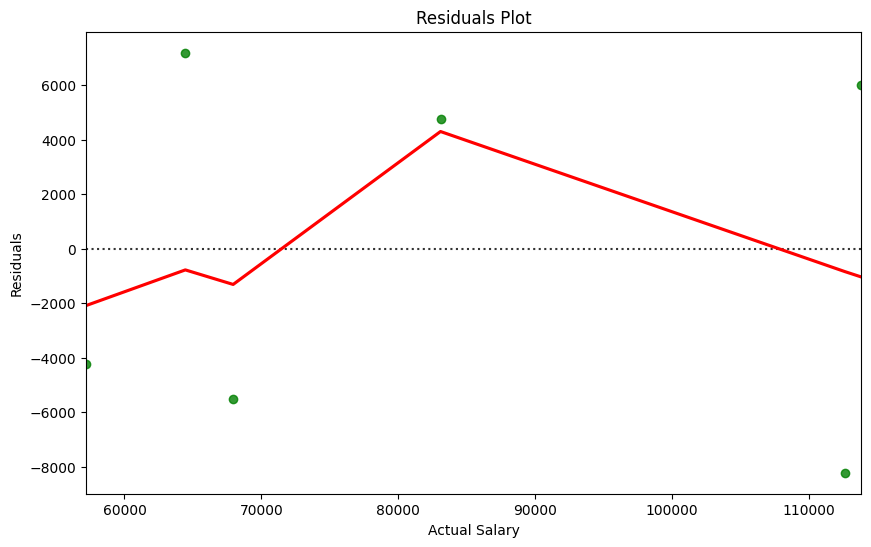

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' are the actual values and 'y_pred' are the predicted values
# Replace these with the actual and predicted data from your model.

# Residuals: Actual values - Predicted values
residuals = y_test - y_pred

# 1. Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()

# 2. Residuals Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color='green', line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Actual Salary')
plt.ylabel('Residuals')
plt.show()


Cross-Validation R² scores: [ 0.38581697 -1.22593659  0.2441607   0.28343226  0.22359091]
Mean R² score from Cross-Validation: -0.01778715230694845
Test Set R² Score: 0.9021627846740266
Test Set Mean Squared Error: 49974852.71999637


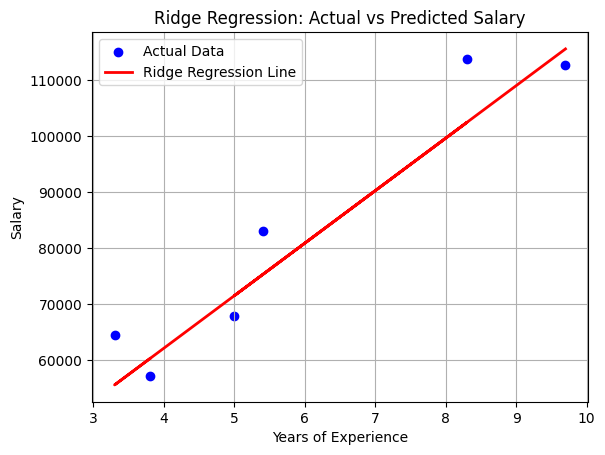

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error



# Define features and target
X = data[['YearsExperience']]  # Independent variable
y = data['Salary']  # Dependent variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength

# Perform Cross-validation
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')  # Using R² as the scoring metric
print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Mean R² score from Cross-Validation: {cv_scores.mean()}")

# Fit Ridge Regression model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R² score on the test set
r2 = r2_score(y_test, y_pred)
print(f"Test Set R² Score: {r2}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error: {mse}")

# Visualize Linear Regression with Ridge
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Line', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Replace 'your_data.csv' with the actual file path of your data
data = pd.read_csv("/content/sample_data/Salary_dataset.csv")

# Define features and target
X = data[['YearsExperience']]  # Independent variable
y = data['Salary']  # Dependent variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [5, 10, None],       # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be a leaf node
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate performance
test_r2_rf = r2_score(y_test, y_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Results
print("Best Hyperparameters:", grid_search.best_params_)
print("Cross-Validation R² Scores:", cv_scores_rf)
print("Mean CV R² Score:", np.mean(cv_scores_rf))
print("Test Set R² Score:", test_r2_rf)
print("Test Set MSE:", test_mse_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation R² Scores: [0.97306488 0.97242432 0.97362759 0.87606882 0.83591944]
Mean CV R² Score: 0.9262210089266525
Test Set R² Score: 0.8930138153563099
Test Set MSE: 54648109.13545444


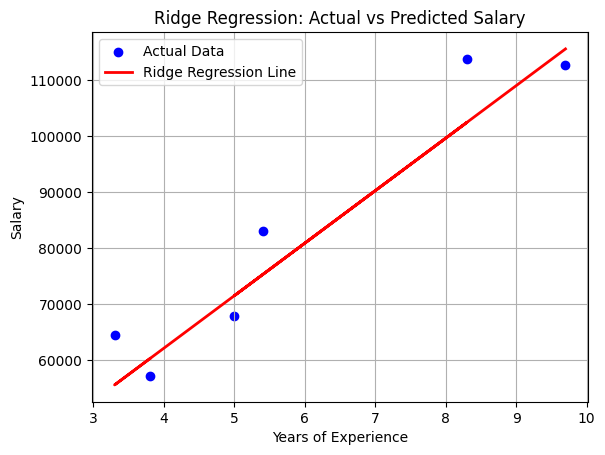

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target
X = data[['YearsExperience']]  # Independent variable
y = data['Salary']  # Dependent variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression (L2 Regularization) - Define and Train the model here
ridge_model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
ridge_model.fit(X_train, y_train)  # Train the model

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# ... (Your existing code for calculating metrics) ...

# Visualize Linear Regression with Ridge (Modified to include y_pred calculation)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Line', linewidth=2)  # y_pred is now available
plt.title('Ridge Regression: Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter space for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0]
}

# Randomized Search for Gradient Boosting
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_gbr.fit(X_train, y_train)

# Best model
best_gbr = random_search_gbr.best_estimator_

# Predictions
y_pred_gbr = best_gbr.predict(X_test)

# Evaluation
test_r2_gbr = r2_score(y_test, y_pred_gbr)
test_mse_gbr = mean_squared_error(y_test, y_pred_gbr)
cv_scores_gbr = cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='r2')

# Results
print("Best Hyperparameters:", random_search_gbr.best_params_)
print("Cross-Validation R² Scores:", cv_scores_gbr)
print("Mean CV R² Score:", np.mean(cv_scores_gbr))
print("Test Set R² Score:", test_r2_gbr)
print("Test Set MSE:", test_mse_gbr)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.05}
Cross-Validation R² Scores: [0.98401266 0.99055773 0.96514427 0.89098456 0.86085951]
Mean CV R² Score: 0.9383117445310095
Test Set R² Score: 0.8466674380658528
Test Set MSE: 78321650.65520267


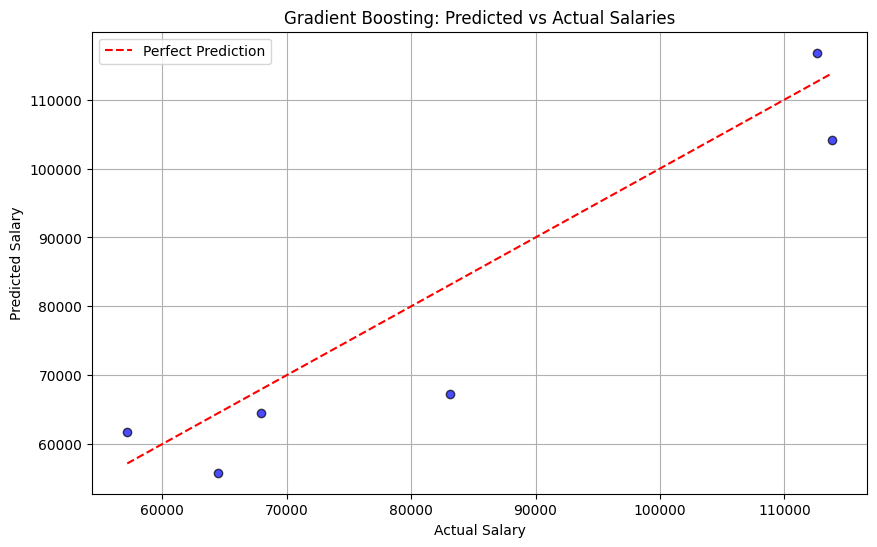

In [12]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title('Gradient Boosting: Predicted vs Actual Salaries')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()


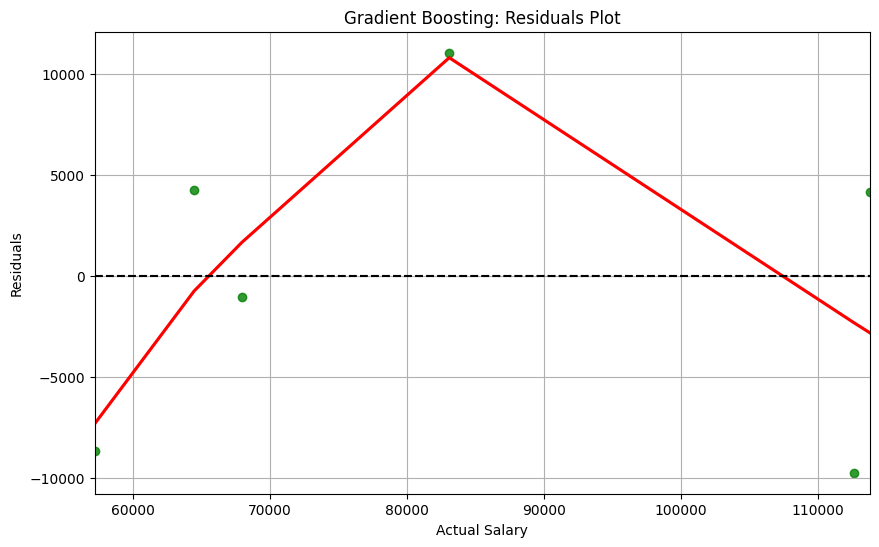

In [13]:
# Residuals
residuals_gbr = y_test - y_pred_gbr

# Residuals Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals_gbr, lowess=True, color='green', line_kws={'color': 'red'})
plt.title('Gradient Boosting: Residuals Plot')
plt.xlabel('Actual Salary')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()


In [17]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
y_test_log

,Salary
27,11.631926
15,11.126380
23,11.642321
17,11.327680
8,11.073598
9,10.954152


In [18]:
import numpy as np

# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)  # log1p ensures no issues with 0 values
y_test_log = np.log1p(y_test)

# Train the Gradient Boosting Model on the transformed data
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Gradient Boosting with default parameters initially
gbr_log = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_log = GridSearchCV(estimator=gbr_log, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_log.fit(X_train, y_train_log)

# Use the best model to predict
best_gbr_log = grid_search_log.best_estimator_
y_pred_log = np.expm1(best_gbr_log.predict(X_test))  # Inverse log transformation to get predictions back to the original scale

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("Log-Transformed Gradient Boosting Results:")
print(f"Best Hyperparameters: {grid_search_log.best_params_}")
print(f"Test Set R² Score: {r2_log}")
print(f"Test Set MSE: {mse_log}")


Log-Transformed Gradient Boosting Results:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Test Set R² Score: 0.8317152095349839
Test Set MSE: 85959188.33630143


In [19]:
# Combine X_train and y_train into a single DataFrame for analysis
import pandas as pd
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_data.columns = list(X.columns) + ['Salary']

# Detect outliers using IQR
Q1 = train_data['Salary'].quantile(0.25)
Q3 = train_data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train_data_no_outliers = train_data[(train_data['Salary'] >= lower_bound) & (train_data['Salary'] <= upper_bound)]

# Separate features and target
X_train_no_outliers = train_data_no_outliers.drop('Salary', axis=1)
y_train_no_outliers = train_data_no_outliers['Salary']

# Retrain the model on the cleaned data
gbr_outliers = GradientBoostingRegressor(random_state=42)
gbr_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set
y_pred_outliers = gbr_outliers.predict(X_test)

# Evaluate performance
mse_outliers = mean_squared_error(y_test, y_pred_outliers)
r2_outliers = r2_score(y_test, y_pred_outliers)

print("Outlier-Handled Gradient Boosting Results:")
print(f"Test Set R² Score: {r2_outliers}")
print(f"Test Set MSE: {mse_outliers}")


Outlier-Handled Gradient Boosting Results:
Test Set R² Score: 0.8052202961617161
Test Set MSE: 99492682.61295848


In [22]:
# Predict and evaluate
y_pred_poly = gbr_poly.predict(X_test_poly) # Use X_test_poly instead of X_test

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Features Gradient Boosting Results:")
print(f"Test Set R² Score: {r2_poly}")
print(f"Test Set MSE: {mse_poly}")

Polynomial Features Gradient Boosting Results:
Test Set R² Score: 0.8021828377021252
Test Set MSE: 101044204.07292034


Polynomial Features Gradient Boosting Results:
Test Set R² Score: 0.8021828377021252
Test Set MSE: 101044204.07292034


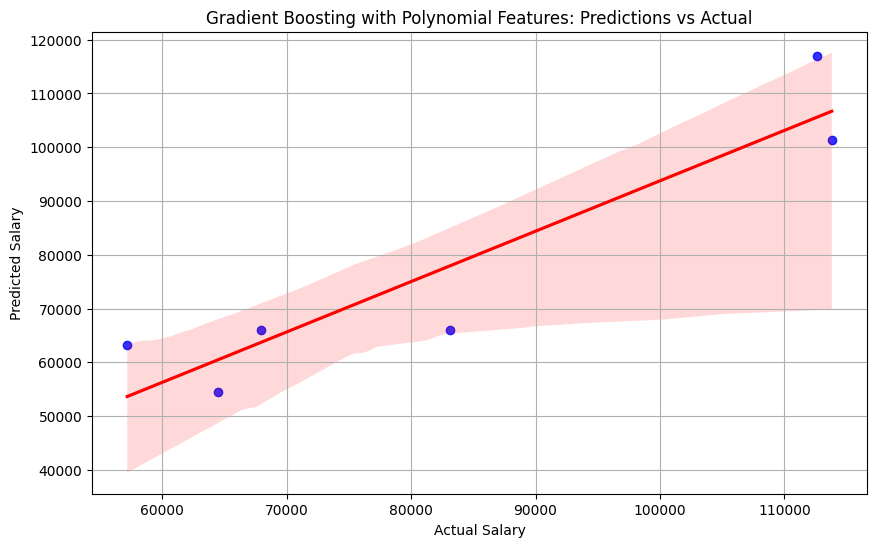

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Separate features (X) and target (y)
X = data[['YearsExperience']]
y = data['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the Gradient Boosting model with polynomial features
gbr_poly = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=5)
gbr_poly.fit(X_train_poly, y_train)

# Predict and evaluate using X_test_poly (the transformed test data)
y_pred_poly = gbr_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Features Gradient Boosting Results:")
print(f"Test Set R² Score: {r2_poly}")
print(f"Test Set MSE: {mse_poly}")

# Visualization (optional - requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_poly, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Gradient Boosting with Polynomial Features: Predictions vs Actual')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.show()

In [30]:
from scipy.stats.mstats import winsorize
y_train_winsorized = winsorize(y_train, limits=[0.05, 0.05])  # Replace top/bottom 5%


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_huber = GradientBoostingRegressor(loss='huber', random_state=42)
gbr_huber.fit(X_train, y_train)


GradientBoostingRegressor(loss='huber', random_state=42)

In [32]:
y_train_log = np.log1p(y_train)  # Log-transform target


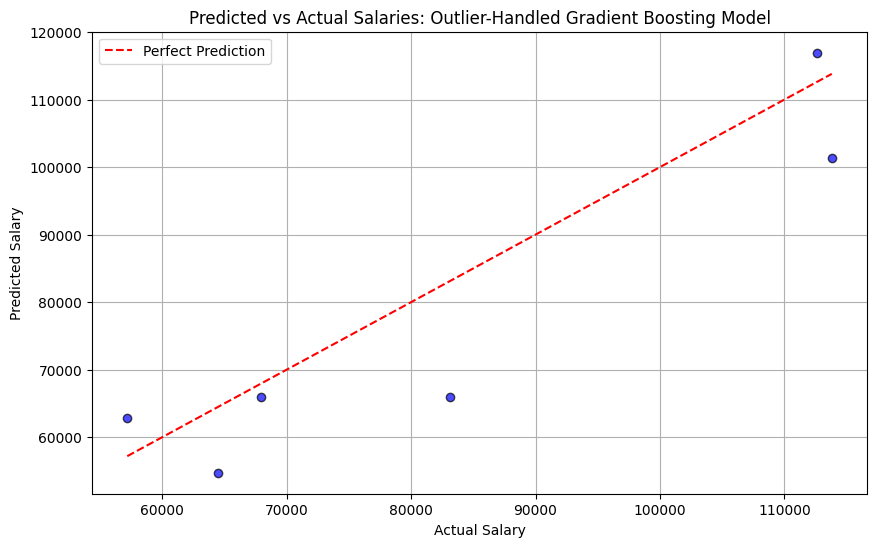

In [33]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_outliers, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.title('Predicted vs Actual Salaries: Outlier-Handled Gradient Boosting Model')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-34-ccde320f732d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


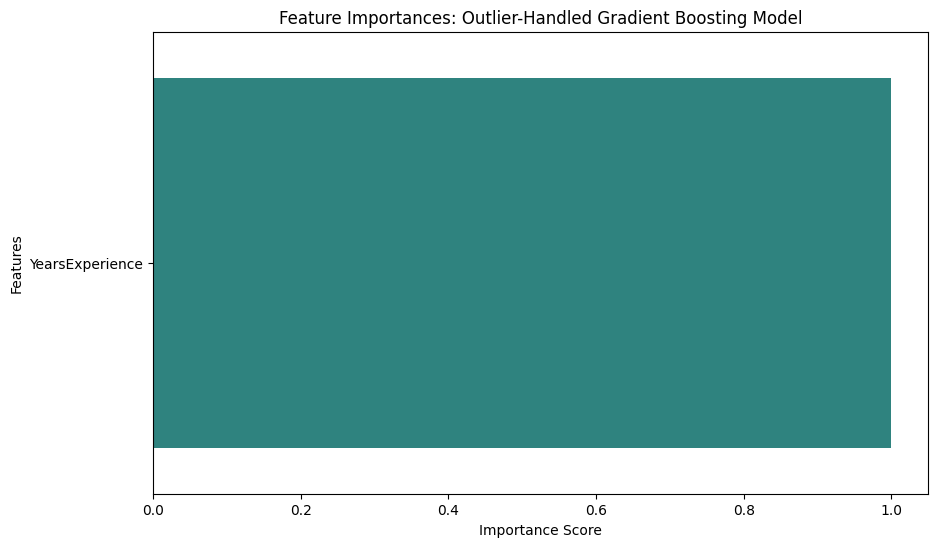

In [34]:
import pandas as pd
import numpy as np

# Feature Importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbr_outliers.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances: Outlier-Handled Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


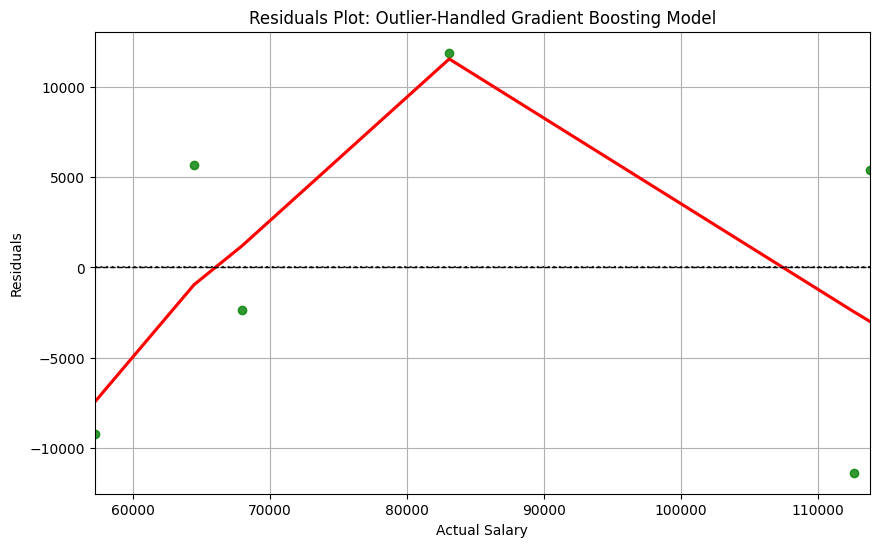

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals calculation
residuals_outlier_handled = y_test - y_pred_outliers  # Use predictions from the outlier-handled model

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals_outlier_handled, lowess=True, color="green", line_kws={'color': 'red'})
plt.title('Residuals Plot: Outlier-Handled Gradient Boosting Model')
plt.xlabel('Actual Salary')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()
